In [1]:
from presets import ClassificationPresetEval, ClassificationPresetTrain
from train import load_data
from argparse import Namespace

import torch
from torch.utils.data.dataloader import default_collate
from torchvision.transforms.functional import to_pil_image
from torchvision import transforms

from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline

In [2]:
mydict = {
    "val_resize_size": 256,
    "val_crop_size": 224,
    "train_crop_size": 224,
    "interpolation": "bilinear",
    "cache_dataset": None,
    "auto_augment": None,
    "random_erase": 0.0,
    "ra_magnitude": 0,
    "augmix_severity": 0,
    "backend": "PIL",
    "use_v2": False,
    "weights": None,
    "test-only": False,
    "distributed": False,

    "batch_size": 4,
    "workers": 2,

}
args = Namespace(**mydict)

In [3]:
train_path, val_path = "data/train", "data/val"
dataset, dataset_test, train_sampler, test_sampler = load_data(traindir=train_path, valdir=val_path, args=args)

Loading data
Loading training data
Took 0.04911327362060547
Loading validation data
Creating data loaders


In [4]:
data_loader = torch.utils.data.DataLoader(
        dataset,
        batch_size=args.batch_size,
        sampler=train_sampler,
        num_workers=args.workers,
        pin_memory=True,
        collate_fn=default_collate,
    )
data_loader_test = torch.utils.data.DataLoader(
        dataset_test, batch_size=args.batch_size, sampler=test_sampler, num_workers=args.workers, pin_memory=True
    )

In [5]:
invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                     std = [ 1., 1., 1. ]),
                               ])

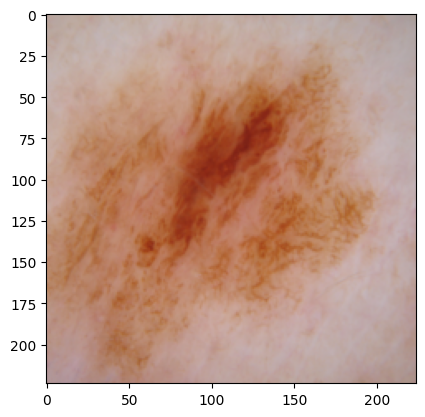

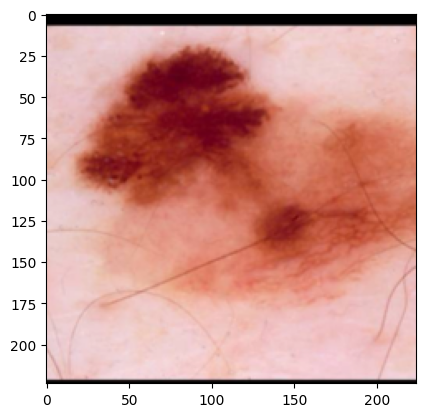

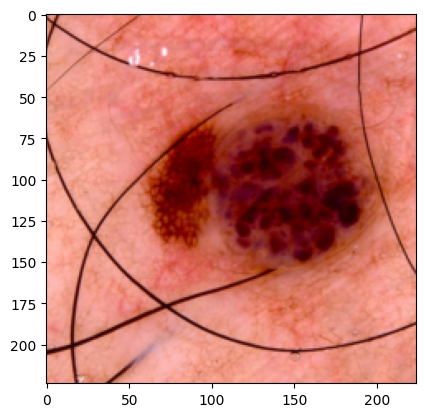

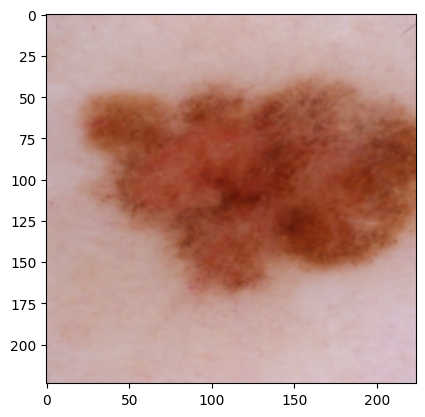

In [6]:
for images, targets in data_loader:
    for image in images:
        plt.imshow(np.asarray(to_pil_image(invTrans(image))))
        plt.pause(1)
    break